# Project: TMDb movie dataset


## Introduction

>This data set contains information about 10,000 movies collected from The Movie Database(TMDb) from 1961 to 2015.  
it includes a 21 columns: 
 0.   id               
 1.   imdb_id              
 2.   popularity          
 3.   budget           
 4.   revenue              
 5.   original_title 
 6.   cast                   
 7.   homepage               
 8.   director               
 9.   tagline                
 10.  keywords               
 11.  overview               
 12.  runtime                 
 13.  genres                 
 14.  production_companies  
 15.  release_date           
 16.  vote_count              
 17.  vote_average          
 18.  release_year            
 19.  budget_adj            
 20.  revenue_adj  

we will investigate this dataset by answering the following points:  
1. Which genres are most popular from year to year?
2. What kinds of properties are associated with movies that have high revenues?
3. What are the top five rated moves?
4. What are the top five moves in terms of profit?
5. Compare between the movies released in the four seasons of the year in terms of profit
6. What is the Perscentage of each genre in each movie for all of the years?   


we will conduct our analysis following the below steps:
1. examining the dataset structure and then looking for missing and duplicate values ( Data Wrangling ) 
2. Data Cleaning:
  1. drop unnecessary columns
  2. drop missing values
  3. drop duplicate values
3. Feature enineering
4. EDA
5. Conclusion

### Importing necessary packages

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

## Data Wrangling


In [2]:
# Load the dataset and explore the first 2 cloumns
tmdb_df = pd.read_csv('tmdb-movies.csv')
tmdb_df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


#### let's take a look at some info about this dataset like: columns, data types, # entries etc...

In [3]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

##### we can know from the cell above the following information about our dataset:  
1. There is 10866 entries
2. There is 21 cloumns
3. we can see each column data type
4. we can see that there is some missing values in the dataset

let's take a look at some stats that descrie the dataset

In [4]:
tmdb_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


we can extract some information about the movies in this dataset like:  
1. Mean run time of the movies is 102 mins
2. the oldest movie released was in 1960 while the newest was in 2015
3. the majority of the movies was releasd between 1995 - 2011
4. Max budget recorded was 4.25 e+08 million dollars
5. The highest average vote for a movie was 9.2 while the lowest was 1.5  


and so much more

#### Now let's explore which columns contain the missing values and duplicate values and how many of them is present in each column 

In [5]:
# columns with missing values
tmdb_df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
# discover how many values of the data are duplicate values
tmdb_df.duplicated().sum()

1

In [7]:
# let's see which row is duplicate value just out of curiosity
tmdb_df[tmdb_df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [8]:
# let's explore some rows which contains missing values just out of curiosity
tmdb_df[tmdb_df['cast'].isna()].head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
371,345637,tt4661600,0.422901,0,0,Sanjay's Super Team,NaN,NaN,Sanjay Patel,NaN,...,Sanjay's Super Team follows the daydream of a ...,7,Animation,Pixar Animation Studios,11/25/15,47,6.9,2015,0.0,0.0
441,355020,tt4908644,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,http://www.netflix.com/title/80031666,Evgeny Afineevsky,The Next Generation Of Revolution,...,A documentary on the unrest in Ukraine during ...,98,Documentary,Passion Pictures|Campbell Grobman Films|Afinee...,10/9/15,37,8.2,2015,0.0,0.0


in the cell above we can notice somthing strange!  
how is it possible for a movie to be made with no budget and recieves no revenue at all! strange right?  
this note should draw our attention to the fact that there may be some missing values in disguise (as zeroes).  
this is an important note to keep in mind


### Data Cleaning

1. drop unnecessary columns
2. drop missing values
3. drop duplicate value
4. check if there is any missing values in disguise (as explained above)

In [9]:
# dropping unnecessary columns
tmdb_df.drop(['id','imdb_id','homepage','tagline','keywords','overview','budget_adj',
              'revenue_adj'],
               axis = 1, inplace = True)

In [10]:
# dropping messing values
tmdb_df.dropna(inplace = True)

In [11]:
# dropping the duplicate value
tmdb_df.drop_duplicates(inplace = True)

In [12]:
# checking the remaining data after cleaninig
tmdb_df.shape

(9772, 13)

In [13]:
# checking for missing values in disguise
tmdb_df[tmdb_df['budget'] == 0].shape

(4751, 13)

In [14]:
tmdb_df[tmdb_df['revenue'] == 0].shape

(5022, 13)

In [15]:
tmdb_df[tmdb_df['vote_count'] == 0].shape

(0, 13)

In [16]:
tmdb_df[tmdb_df['vote_average'] == 0].shape

(0, 13)

In [17]:
tmdb_df[tmdb_df['popularity'] == 0].shape

(0, 13)

we can see from the cells above that there is a lot of missing values for (budget, revenue) columns   
we will keep them for now because the only missing values in these rows are the (budget, revenue) and excluding the rows with the 2 missing values will result in huge loss in data used in the analysis.

### making new feature


In [18]:
# create month feature from release_date column
tmdb_df['release_month'] = tmdb_df['release_date'].apply(lambda x: int(x[0]))

In [19]:
# drop the release_date column
tmdb_df.drop('release_date', axis = 1, inplace = True)

In [20]:
# make profit column out of (budget, revenue) columns
# profit is: revenue - budget
# keeping in mind those zero values of (budget, revenue)
tmdb_df['profit'] = tmdb_df['revenue'] - tmdb_df['budget'] 

Now we will extract more feature from the 'genres' column to inspect them more closely  
by extracting the unique values from the 'genres' column and use these values as new features.  
to make this clear let's take an example: suppose that the 'genres' column contains the following:  
***'Action|Drama|War'***   
what we will do is this:    

|'Action' | 'Drama' | 'War'|   
|:-------:|:-------:|:----:|    
|1        |    1    | 1    |    


In [21]:
# get the unique values in the genres column
genres_ls = []
for x in tmdb_df['genres'].str.split('|'):
    for y in x:
        genres_ls.append(y)

genres_ls = np.array(genres_ls)
unique_genres_ls = np.unique(genres_ls)   

In [22]:
# creating new features
for ls in unique_genres_ls:
    tmdb_df[ls] = tmdb_df['genres'].str.split('|').apply(lambda x : 1 if ls in x else 0 )

In [23]:
# drop genres column
tmdb_df.drop('genres', axis = 1, inplace= True)


Now we will rearange the order of columns for more organized structure

In [24]:
# reordering column names 
col_names = ['original_title',  'cast' ,'director',
             
             'Action', 'Adventure',
             'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
             'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
             'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western',
             
             'vote_average','vote_count','popularity','runtime', 'production_companies',
             'release_month', 'release_year',
             
             'budget','revenue', 'profit']


In [25]:
tmdb_df = pd.DataFrame(data = tmdb_df, columns= col_names)

## Exploratory Data Analysis


### Explore the histogram of some of the dataset columns

,vote_average
count,9772.000000
mean,5.963528
std,0.913174
min,1.500000
25%,5.400000
50%,6.000000
75%,6.600000
max,8.700000


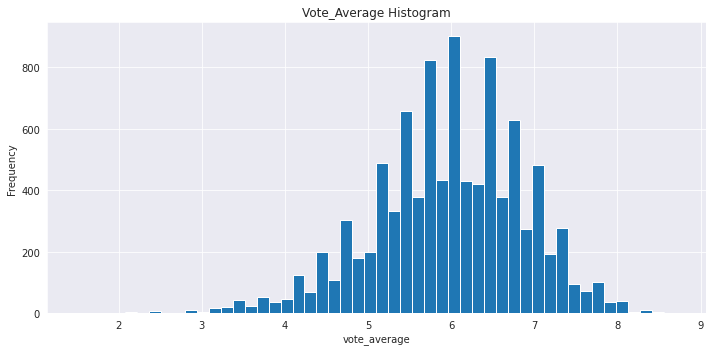

In [26]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
tmdb_df['vote_average'].plot.hist(bins = 50);
plt.title('Vote_Average Histogram'); 
plt.xlabel('vote_average');
plt.tight_layout()
pd.DataFrame(tmdb_df['vote_average'].describe())

we can see that vote_average is normaly distributed, and the majority of the voting values are between (5-7)

,vote_count
count,9772.000000
mean,239.312014
std,603.011504
min,10.000000
25%,18.000000
50%,46.000000
75%,173.000000
max,9767.000000


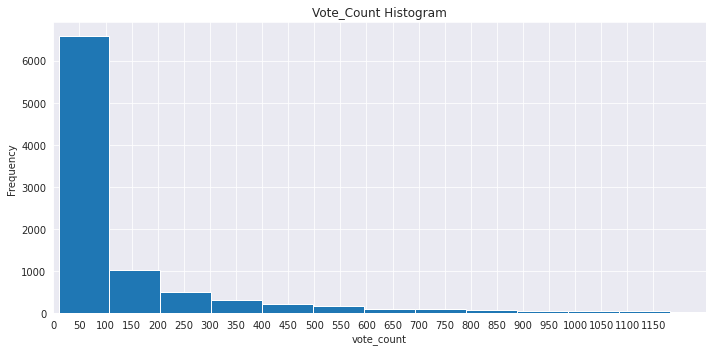

In [27]:
plt.figure(figsize=(10,5))
tmdb_df['vote_count'].plot.hist(bins = 100);
plt.title('Vote_Count Histogram'); 
plt.xlabel('vote_count');
plt.xlim([0 , 1250])
plt.xticks(np.arange(0, 1200, step=50))
plt.tight_layout()
pd.DataFrame(tmdb_df['vote_count'].describe())

we can see that the majority of the moveis have a vote count between (10-150) votes as well as mean vote count = 239  
as shown in the graph and stats table

,release_year
count,9772.000000
mean,2000.878428
std,13.036794
min,1960.000000
25%,1994.000000
50%,2005.000000
75%,2011.000000
max,2015.000000


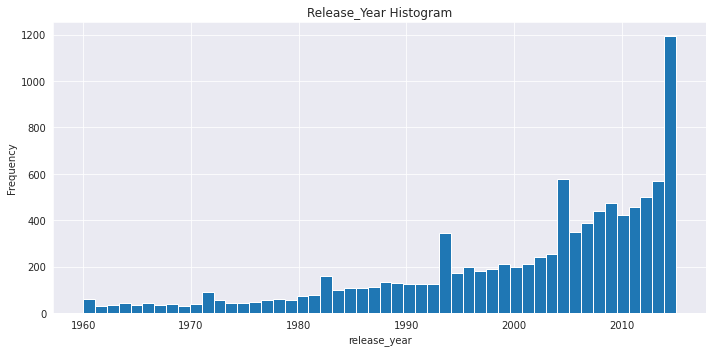

In [28]:
plt.figure(figsize=(10,5))
tmdb_df['release_year'].plot.hist(bins = 50);
plt.title('Release_Year Histogram'); 
plt.xlabel('release_year');
plt.tight_layout()
pd.DataFrame(tmdb_df['release_year'].describe())

we can see that the majority of the movies are released between the year(1995 - 2011) 

,runtime
count,9772.000000
mean,102.926627
std,27.877432
min,0.000000
25%,90.000000
50%,100.000000
75%,112.000000
max,877.000000


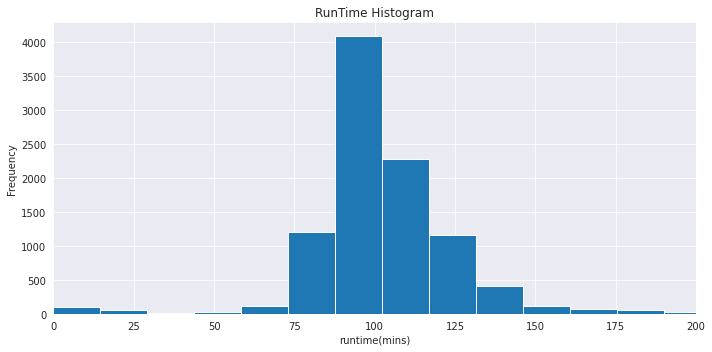

In [29]:
plt.figure(figsize=(10,5))
tmdb_df['runtime'].plot.hist(bins = 60);
plt.title('RunTime Histogram'); 
plt.xlabel('runtime(mins)');
plt.xlim([0,200])
plt.tight_layout()
pd.DataFrame(tmdb_df['runtime'].describe())

we can see that the majority of the movies runtime is between (90-112) mins with a mean of 100 mins approximately 

### Explore the relation between movie average rating and run time

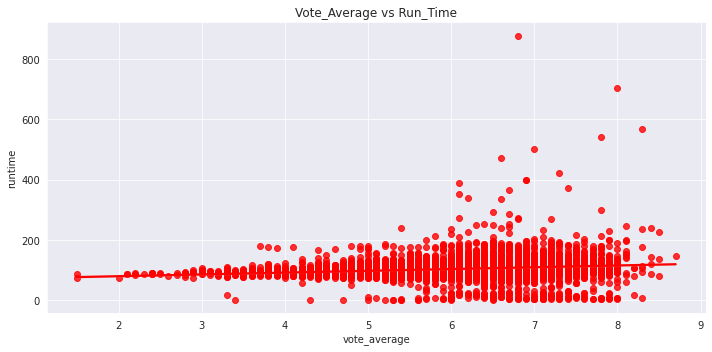

In [30]:
plt.figure(figsize=(10,5))
sns.regplot(y = 'runtime', x = 'vote_average', data = tmdb_df, color="red")
plt.title('Vote_Average vs Run_Time')
plt.tight_layout()


In [31]:
tmdb_df[['runtime','vote_average']].corr()

,runtime,vote_average
runtime,1.000000,0.193973
vote_average,0.193973,1.000000


we can see that the relation between runtime and vote average is almost a stright line with 
correlation = 0.19

### Explore the relation between popularity and vote average

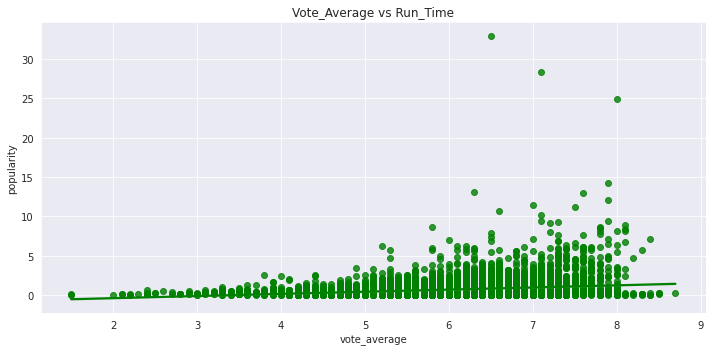

In [32]:
plt.figure(figsize=(10,5))
sns.regplot(y = 'popularity', x = 'vote_average', data = tmdb_df, color="green")
plt.title('Vote_Average vs Run_Time')
plt.tight_layout()


In [33]:
tmdb_df[['popularity','vote_average']].corr()

,popularity,vote_average
popularity,1.000000,0.239121
vote_average,0.239121,1.000000


we can see that the relation between popularity and vote average is almost a stright line with a slight increase in popularity as vote average increases. with a 
correlation = 0.24

### Explore the relation between budget and revenue

In [34]:
# Extracting the movies which does not have budget or revenue equal to 0 
tmdb_df_edit = tmdb_df[(tmdb_df['budget'] != 0) & (tmdb_df['revenue'] != 0)]

# make sure that every thing went well
print(tmdb_df_edit.shape)
print(tmdb_df_edit[tmdb_df_edit['budget'] == 0].shape)
print(tmdb_df_edit[tmdb_df_edit['revenue'] == 0].shape)

(3805, 33)
(0, 33)
(0, 33)


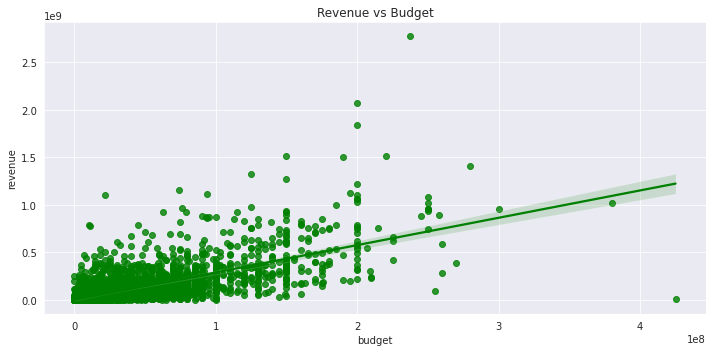

In [35]:
plt.figure(figsize=(10,5))
sns.regplot(y = 'revenue', x = 'budget', data = tmdb_df_edit, color="green")
plt.title('Revenue vs Budget')
plt.tight_layout()


In [36]:
tmdb_df[['revenue','budget']].corr()

,revenue,budget
revenue,1.000000,0.731204
budget,0.731204,1.000000


###  Top 5 Production Companies 

we will sellect the top 5 production companies in terms of profits by grouping the dataframe by "production_companies" and then sorting by profits we will use "tmdb_df_edit" dataframe as it does not include any values for (budget, revenue) equal to zero

In [37]:
# get the top 5 production companies and sort by profits
df_temp = tmdb_df_edit.groupby('production_companies').mean().sort_values(by = 'profit', ascending = False)[0:5]

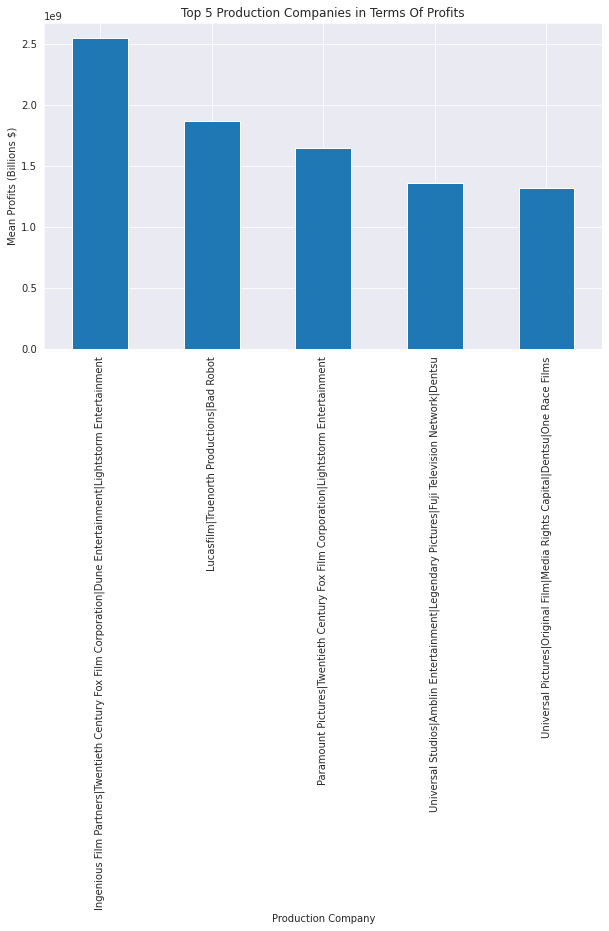

In [38]:
plt.figure(figsize=(10,6))
df_temp['profit'].plot.bar()
plt.xlabel('Production Company');
plt.ylabel('Mean Profits (Billions $)');
plt.title('Top 5 Production Companies in Terms Of Profits');

##  Conclusions & Visuals

### Which genres are most popular from year to year?

This question is important because it shows which genres is the most popular as  will as it provides an intuition of how these genres evolved over the years.  
we can approach this problem by:  
1. detrminig the top 3 genres:
  1. getting the count of each genre store it in a dict
  2. sorting the dict and appending the top 3 genres to the top_3 list
2. ploting the change over the years to see the change from year to year

In [39]:
genres_ls = ['Action', 'Adventure',
             'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
             'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
             'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']


In [40]:
# getting the count of each genre
# and store it in a dict
temp_dict = {}
for genre in genres_ls:
    temp_df = tmdb_df.groupby(genre).count()
    temp_dict[genre] = (temp_df.loc[temp_df.index.get_level_values(genre) == 1]['cast'].values[0]) # the selection of cast 
                                                                                                  # is not for specific reason 
                                                                                                # as we count the occurances 

In [41]:
# sorting and appending to the top_3 list
sort_genres = sorted(temp_dict.items(), key=lambda x: x[1], reverse=True)
top_3 = []
for genre in sort_genres[0:3]:
    top_3.append(genre[0])


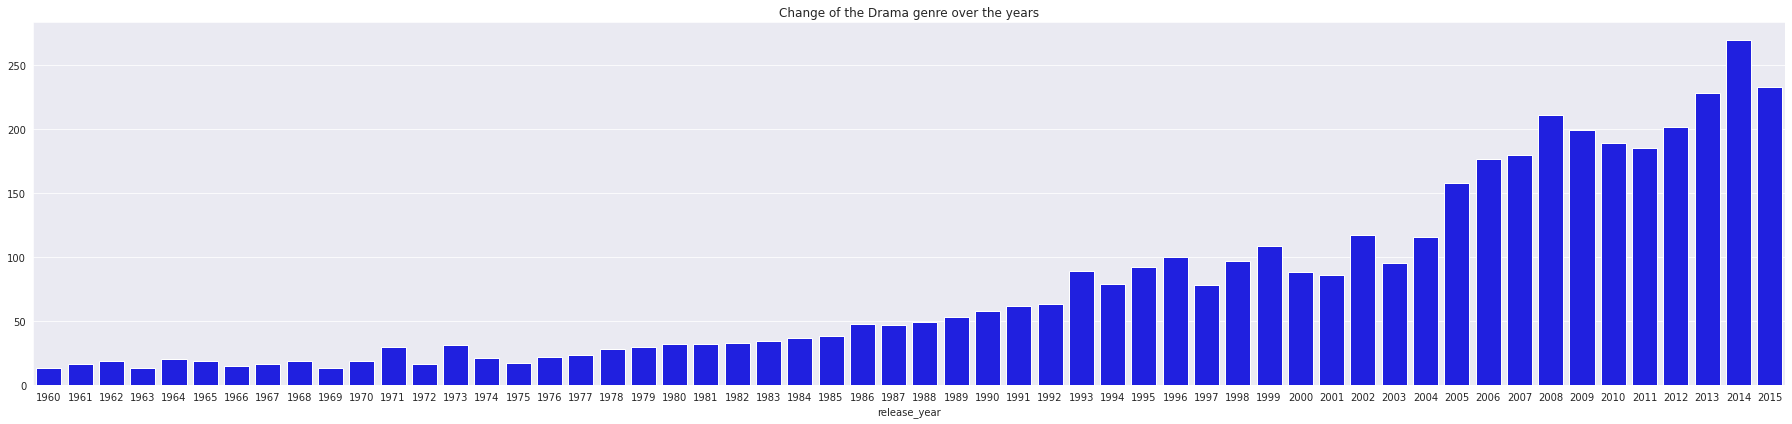

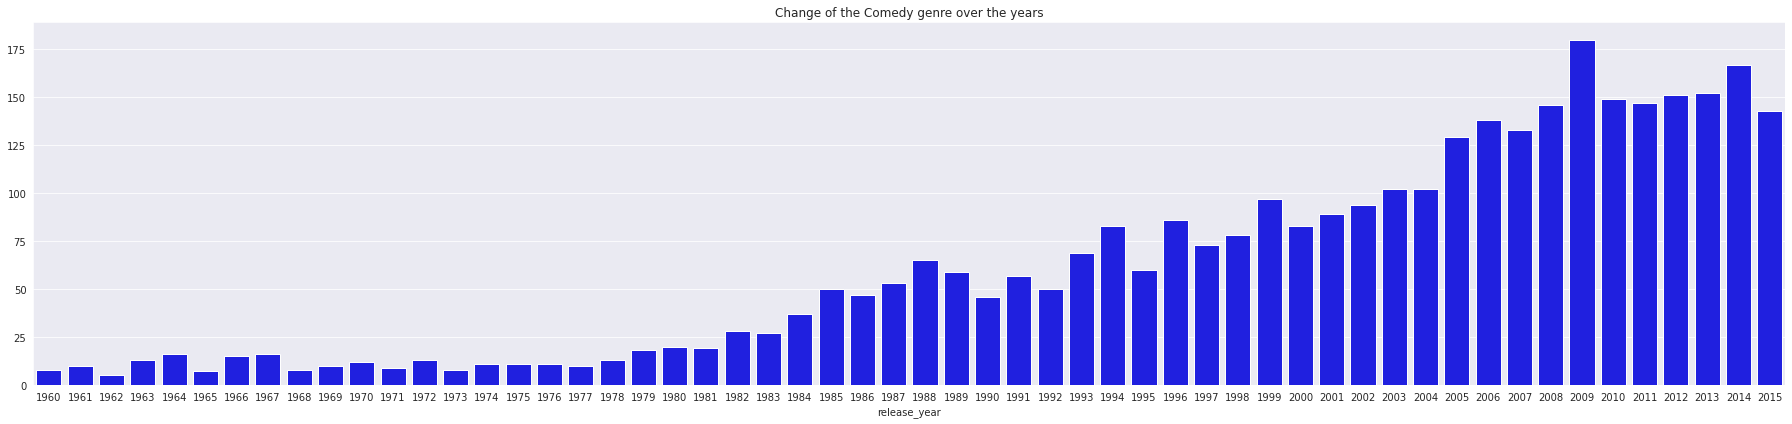

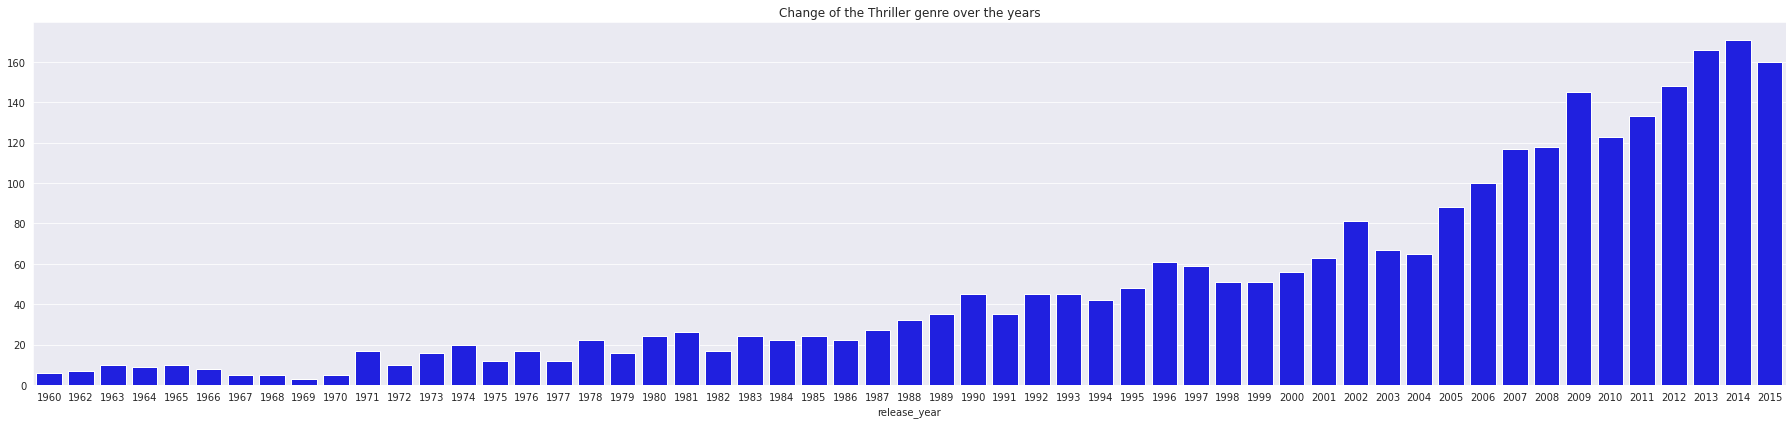

In [42]:
# ploting the change over the years
for genre in top_3:
    x = tmdb_df.groupby(['release_year',genre]).count()
    z = x.loc[(x.index.get_level_values('release_year') >= 1960) & (x.index.get_level_values(genre) == 1)]['cast']
    plt.figure(figsize=(25,6))
    sns.barplot(x = z.index.get_level_values('release_year'),
                y = z.values, color= 'blue')
    plt.title('Change of the {} genre over the years'.format(genre))
    plt.tight_layout()

we can see that the top 3 gemres are ("Drama", "Comedy", "Thriller") and by examining the plot of each genre we can see how each genre is getting more involved in the movies year after year as there is an increasing in the number of moveies over the years which includes top 3 genres 

### What kinds of properties are associated with movies that have high revenues?

This question will give us more insights about the characteristics of the movies that have high revenues 

we will answer this question as follows:
1. filter the dataframe to exclude the values of revenue equal to 0
2. get the mean of revenues for all movies
3. filter the dataFrame to get the movies > mean_rev

In [43]:
# filter the dataframe to exclude the values of revenue equal to 0
new_df =  tmdb_df[tmdb_df['revenue'] != 0]
# get the mean of revenues for all movies
mean_rev = new_df['revenue'].mean()

In [44]:
# then filter the dataFrame to get the movies > mean_rev
new_df[new_df['revenue'] > mean_rev][['original_title','vote_average','vote_count',
                                        'popularity','runtime','profit']].head(3)

,original_title,vote_average,vote_count,popularity,runtime,profit
0,Jurassic World,6.5,5562,32.985763,124,1363528810
1,Mad Max: Fury Road,7.1,6185,28.419936,120,228436354
2,Insurgent,6.3,2480,13.112507,119,185238201


### What are the top five rated moves

this quistion will give us information about top 5 rated movies which will enable us of figuring out some important information if we compare it to other findings.

we will filter the dataframe by "vote_average" and then sellecting the first 5 elements 

In [45]:
tmdb_df.sort_values(ascending = False, by = 'vote_average')[['original_title','vote_average']].head(5)

,original_title,vote_average
6911,Pink Floyd: Pulse,8.7
8411,Queen - Rock Montreal,8.5
8221,A Personal Journey with Martin Scorsese Throug...,8.5
3690,The Art of Flight,8.5
5986,"Guten Tag, RamÃ³n",8.4


### What are the top five moves in terms of profit

this quistion will give us information about top 5 rated movies which will enable us of figuring out some important information if we compare it to other findings.

for this section and the one that follows we will exclude the rows in which (budget, revenue) equal to 0 
by using the "tmdb_df_edit" dataframe, then sorting by profit and sellecting the first 5 elements

In [46]:
#sorting the values by profit in a descending order
tmdb_df_edit.sort_values(ascending = False, by = 'profit')[['original_title','vote_average','profit']].head(5)

,original_title,vote_average,profit
1386,Avatar,7.1,2544505847
3,Star Wars: The Force Awakens,7.5,1868178225
5231,Titanic,7.3,1645034188
0,Jurassic World,6.5,1363528810
4,Furious 7,7.3,1316249360


### Compare between the movies released in the four seasons of the year in terms of profit

this comparison will enable us to see how the profits of the movies vary when released in diffrent times of the year.

we will begin by extracting the mean profits for each seaeon (winter,spring,summer,autumn) and then ploting these values

In [47]:
# get the mean profit of the movies which is released in four seasons monthes
winter_mean = tmdb_df_edit[tmdb_df_edit['release_month'].isin([12,1,2])]['profit'].mean()
spring_mean = tmdb_df_edit[tmdb_df_edit['release_month'].isin([3,4,5])]['profit'].mean()
summer_mean = tmdb_df_edit[tmdb_df_edit['release_month'].isin([6,7,8])]['profit'].mean()
Autumn_mean = tmdb_df_edit[tmdb_df_edit['release_month'].isin([9,10,11])]['profit'].mean()

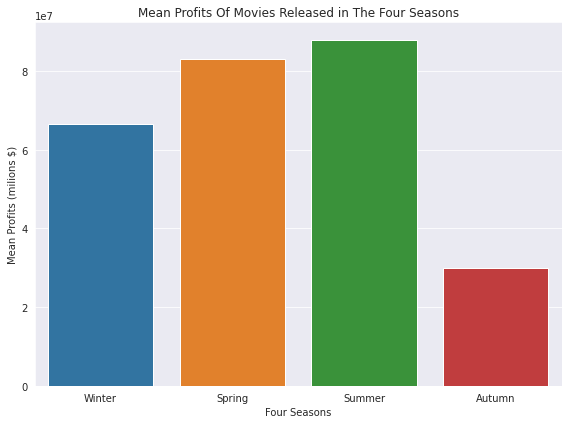

In [48]:
# plot the values 
plt.figure(figsize=(8,6))
sns.barplot(x = ['Winter','Spring','Summer','Autumn'], 
            y = [winter_mean,spring_mean,summer_mean,Autumn_mean])
plt.title('Mean Profits Of Movies Released in The Four Seasons')
plt.xlabel('Four Seasons')
plt.ylabel('Mean Profits (milions $)')
plt.tight_layout()

we can see from the plot that the movies which is released in summer has the highest profits followed by the spring compared to the ones released in winter and autumn. which make sense because the longest vaction is in summer and spring so a lot of people is more likely to watch movies which is released in summer and spring.   

### What is the Perscentage of each genre in each movie for all of the years?

this will give us information on the share of each genre in movies over all the years.  
we will create a list containing the count of each genre then use matplotlip to plot the pie chart.

In [49]:
# create a list with each genre count  
genres = []
for genre in genres_ls:
    genres.append(tmdb_df[tmdb_df[genre] == 1].shape[0])

    

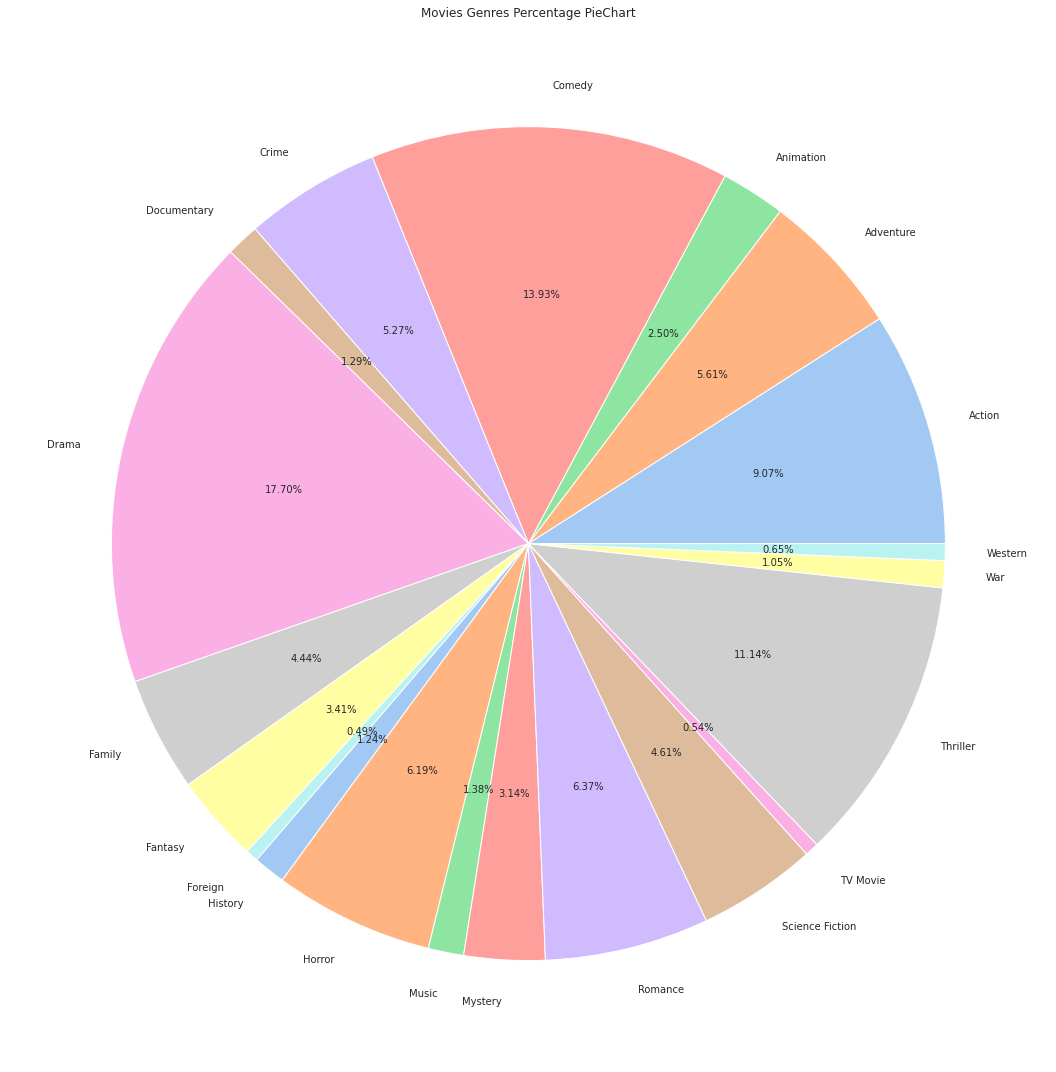

In [50]:
# setting the figsize
plt.figure(figsize = (25,15))
#create pie chart
colors = sns.color_palette('pastel')[0:30]
plt.pie(genres, labels = genres_ls, colors = colors, autopct='%.2f%%')
plt.title('Movies Genres Percentage PieChart')
plt.tight_layout()
plt.show()


we can see from the pie chart the top 3 genres over all years are : 
1. Daram
2. Comedy
3. Threiller

### What are the top 3 expesive genres of all time?

this will enable us to know which types of movies cost more to make 

we can approach this problem by:  
1. detrminig the top 3 genres:
  1. getting the mean of profit for each genre and store it in a dict
  2. sorting the dict and appending the top 3 genres to the top_3 list
2. Appending the mean budget value for each genre in mean_budget_ls
3. ploting the values.

In [51]:
# getting the count of each genre
# and store it in a dict
temp_dict = {}
for genre in genres_ls:
    temp_df = tmdb_df.groupby(genre).mean()
    temp_dict[genre] = (temp_df.loc[temp_df.index.get_level_values(genre) == 1]['profit'].values[0])
# sort and appending to the top_3 ls
sort_genres = sorted(temp_dict.items(), key=lambda x: x[1], reverse=True)
top_3 = []
for genre in sort_genres[0:3]:
    top_3.append(genre[0])


In [52]:
mean_budget_ls = []
for genre in top_3:
    mean_budget_ls.append(tmdb_df[[genre,'budget']].sort_values(by = 'budget', ascending = False)['budget'].mean())

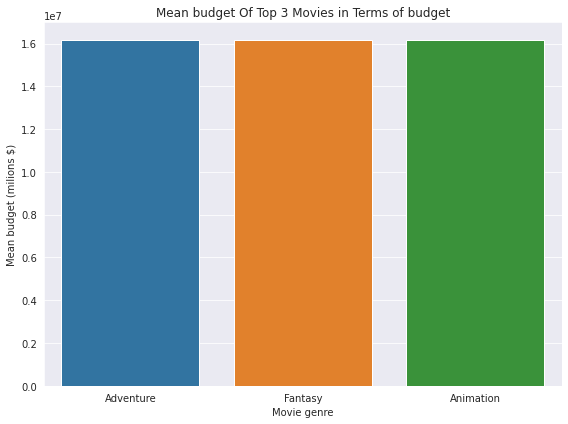

In [53]:
plt.figure(figsize=(8,6))
sns.barplot(x = top_3, 
            y = mean_budget_ls)
plt.title('Mean budget Of Top 3 Movies in Terms of budget')
plt.xlabel('Movie genre')
plt.ylabel('Mean budget (milions $)')
plt.tight_layout()

## Limitations:



This Data includes 10866 entries from (1960 - 2015) which is (at first glance) a good representative of the population but Unfortunately the cleaned version is not because the number of samples drops down to 3805. fortunately most of the missing values were not significant but the revenue and budget (before excluding the missing values of budget and revenue the number of samples were 9772). inorder to overcome this issue we used the data of which include 9772 samples in all the analysis that is not related to the following features:  
1. budget
2. revenue
3. profit   


and for the related analysis we used the data which contains 3805 samples making the analysis not robust.   
considering any imputation method like (mean, mode, etc ...) will make the analysis unreliable as there is no relation between the budget and revenue of a movie and the other. so, this was the biggest limitation in this dataset.


## Summary


>we will summarize the findings of this analysis in following steps:  
* The Top 3 genres are ("Drama", "Comedy", "Thirller") and there is an increase of movies which contain one of these genres year after year.
* Interestingly the top 5 movies in terms of profits are not the top 5 rated movies, this suggests that the opinoin of common people (which is represented by profits) is diffrent from the critics opinion (which is reprsented by vote average). also if the movie has high profit this does not make it a perfect movie (from critics point of perspective).
* Comparison between movies releasd in the four seasons of the year showed that the highest profits goes to the movies which is released in the summer.
* we can see that the most expensive 3 types of movies are ("Adventure","Fantasy","Animation"), which make sense because making of this movies involve in a lot of CGI and decoration and technology which coast a lot of money.
